In [14]:
import numpy as np

In [15]:
import pandas as pd

In [16]:
np.random.seed(42)

In [17]:
employee_ids=[f"EMP_{i:03d}"for i in range(1,31)]
dates=pd.date_range("2025-07-01",periods=30,freq="D")

In [18]:
employee_ids

['EMP_001',
 'EMP_002',
 'EMP_003',
 'EMP_004',
 'EMP_005',
 'EMP_006',
 'EMP_007',
 'EMP_008',
 'EMP_009',
 'EMP_010',
 'EMP_011',
 'EMP_012',
 'EMP_013',
 'EMP_014',
 'EMP_015',
 'EMP_016',
 'EMP_017',
 'EMP_018',
 'EMP_019',
 'EMP_020',
 'EMP_021',
 'EMP_022',
 'EMP_023',
 'EMP_024',
 'EMP_025',
 'EMP_026',
 'EMP_027',
 'EMP_028',
 'EMP_029',
 'EMP_030']

In [20]:
data={
    "Data":np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids,len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_ids)).round(2)
}

In [21]:
df=pd.DataFrame(data)

In [38]:
row=df.iloc[2]
row

Data             2025-07-03 00:00:00
Employee_ID                  EMP_001
Working_Hours                   8.39
Name: 2, dtype: object

In [23]:
df.to_csv("employee_working_hours.csv",index=False)

In [24]:
#Read from CSV
df_csv=pd.read_csv("employee_working_hours.csv")

In [25]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Data Employee_ID  Working_Hours
0  2025-07-01     EMP_001           6.25
1  2025-07-02     EMP_001           9.70
2  2025-07-03     EMP_001           8.39
3  2025-07-04     EMP_001           7.59
4  2025-07-05     EMP_001           4.94
       Working_Hours
count     900.000000
mean        6.954233
std         1.762088
min         4.030000
25%         5.387500
50%         7.010000
75%         8.490000
max        10.000000
30


In [27]:
#Total hours per employee
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

In [28]:
total_hours

Employee_ID
EMP_009    228.84
EMP_018    226.10
EMP_017    225.95
EMP_014    224.92
EMP_027    220.85
EMP_025    214.07
EMP_026    212.33
EMP_016    211.56
EMP_007    210.91
EMP_010    210.88
EMP_008    210.81
EMP_011    210.77
EMP_028    209.51
EMP_019    209.42
EMP_002    209.37
EMP_004    208.46
EMP_013    207.72
EMP_003    206.79
EMP_015    206.67
EMP_024    204.46
EMP_006    204.29
EMP_023    203.64
EMP_005    202.07
EMP_022    200.73
EMP_020    199.91
EMP_029    199.89
EMP_001    198.96
EMP_012    196.52
EMP_021    192.18
EMP_030    190.23
Name: Working_Hours, dtype: float64

In [29]:
avg_daily=df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [30]:
threshold_low=5
threshold_high=9
df_csv["Low_Hour_Flag"]=df_csv["Working_Hours"]<threshold_low
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"]>threshold_high

In [32]:
#view flagged rows
print(df_csv[df_csv["Low_Hour_Flag"]|df_csv["High_Hour_Flag"]].head())

         Data Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1  2025-07-02     EMP_001           9.70          False            True
4  2025-07-05     EMP_001           4.94           True           False
5  2025-07-06     EMP_001           4.94           True           False
6  2025-07-07     EMP_001           4.35           True           False
7  2025-07-08     EMP_001           9.20          False            True


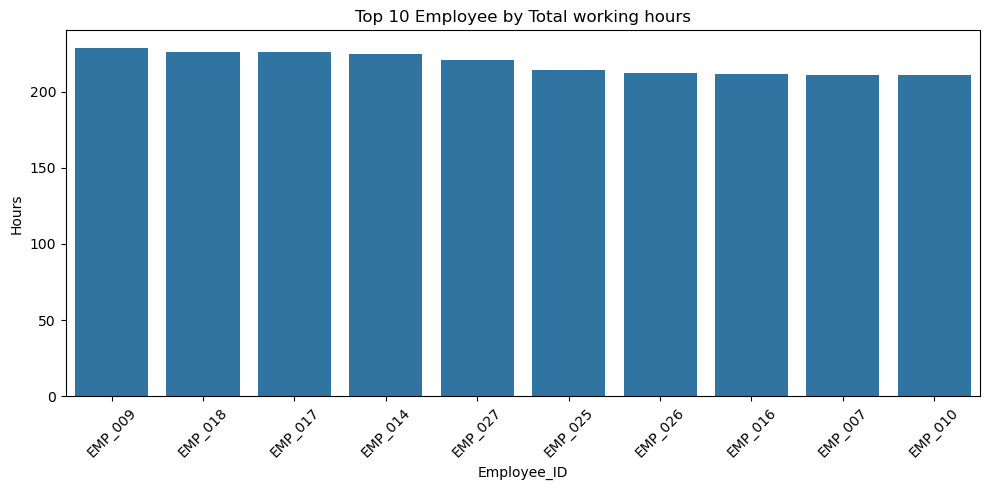

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
#Bar chart oc top 10 employee with highest total hour
top10=total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employee by Total working hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

In [37]:
row=df_csv.loc["EMP_001"]

KeyError: 'EMP_001'